# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [151]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('insurance_data.csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Type of columns
- Numerical Columns - `age`, `bmi`, `bloodpressure`, `claim`
- Categorical Columns - `gender`, `diabetic`, `children`, `smoker`, `region`

# Univartiate Analysis

### Numerical Columns
`age`
- is uniform 
- no outliers
- little missing values
- is float need to change datatype

<AxesSubplot:ylabel='Frequency'>

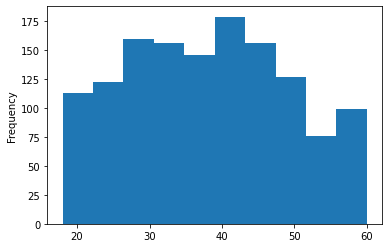

In [88]:
df['age'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

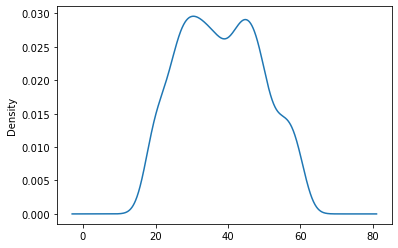

In [89]:
df['age'].plot(kind='kde')

In [90]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [91]:
df.age.isna().sum()

5

<AxesSubplot:>

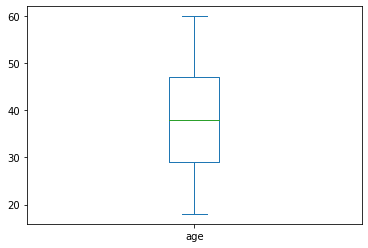

In [92]:
df.age.plot(kind='box')

In [93]:
df.age.skew()

0.11361133741072633

`bmi` 
- have some outliers although not very severe

<AxesSubplot:>

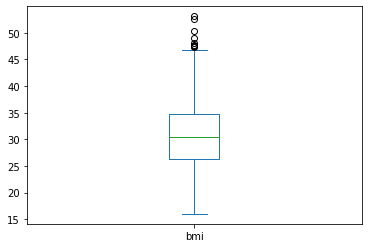

In [94]:
df.bmi.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

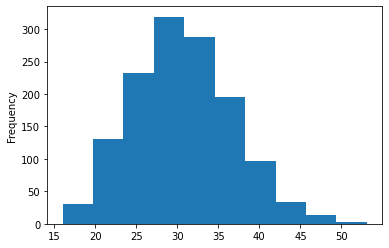

In [95]:
df.bmi.plot(kind='hist')

In [96]:
df.bmi.isna().sum()

0

<AxesSubplot:ylabel='Density'>

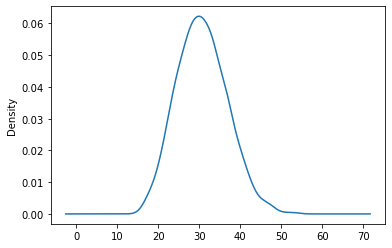

In [97]:
df.bmi.plot(kind='kde')

`bloodpressure`
- is skewed(positive)
- have outliers 

<AxesSubplot:ylabel='Frequency'>

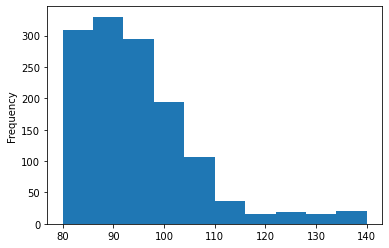

In [98]:
df.bloodpressure.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

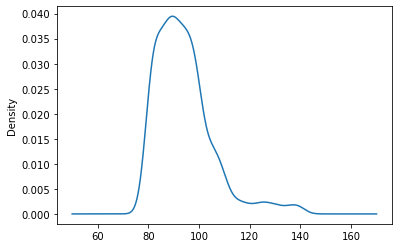

In [99]:
df.bloodpressure.plot(kind='kde')

In [100]:
df.bloodpressure.skew()

1.4835342102293079

<AxesSubplot:>

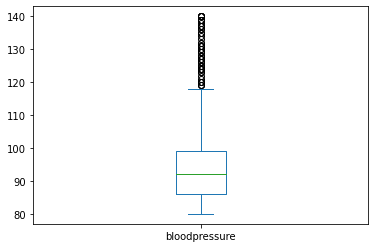

In [101]:
df.bloodpressure.plot(kind='box')

In [102]:
df.bloodpressure.isna().sum()

0

`claim`
- highly skewed(positive)
- have outliers

In [103]:
df.claim.isna().sum()

0

In [104]:
df.claim.describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<AxesSubplot:ylabel='Density'>

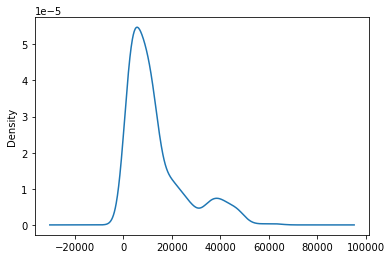

In [105]:
df.claim.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

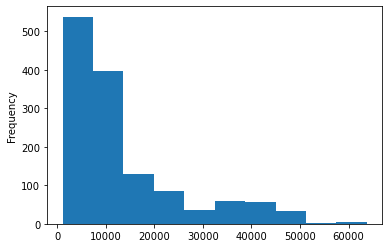

In [106]:
df.claim.plot(kind='hist')

In [107]:
df.claim.skew()

1.5167468509489237

<AxesSubplot:>

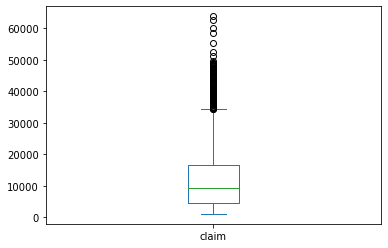

In [108]:
df.claim.plot(kind='box')

### Categorical Columns
`gender`
- balanced data

In [109]:
df.gender.value_counts()

male      678
female    662
Name: gender, dtype: int64

<AxesSubplot:>

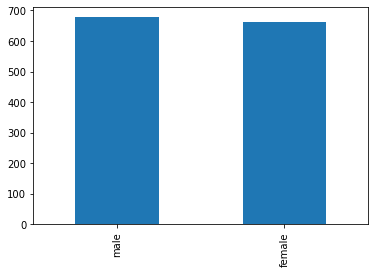

In [110]:
df.gender.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='gender'>

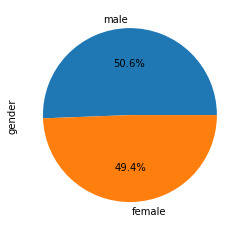

In [111]:
df.gender.value_counts().plot(kind='pie',autopct='%0.1f%%')

In [112]:
df.gender.isna().sum()

0

`diabetic`
- balanced data

In [113]:
df.diabetic.isna().sum()

0

In [114]:
df.diabetic.describe()

count     1340
unique       2
top         No
freq       698
Name: diabetic, dtype: object

In [115]:
df.diabetic.value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

<AxesSubplot:>

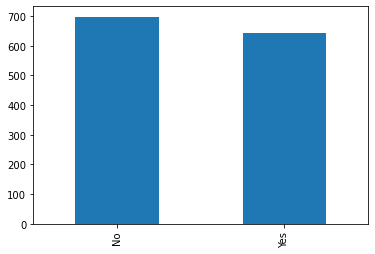

In [116]:
df.diabetic.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='diabetic'>

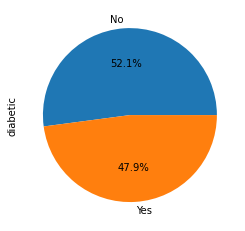

In [117]:
df.diabetic.value_counts().plot(kind='pie',autopct='%0.1f%%')

`children`
- have 5 categories need to merge

In [118]:
df.children.isna().sum()

0

In [119]:
df.children.value_counts()

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:>

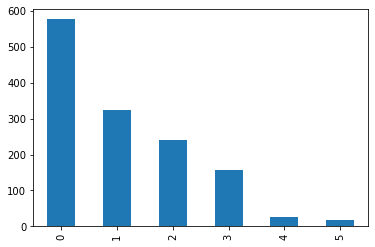

In [120]:
df.children.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='children'>

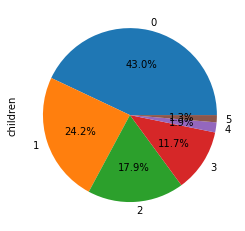

In [121]:
df.children.value_counts().plot(kind='pie',autopct='%0.1f%%')

`region`
- some missing values
- northeast has less data

In [122]:
df.region.isna().sum()

3

In [123]:
df.region.value_counts()

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

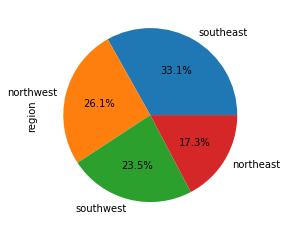

In [124]:
df.region.value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:>

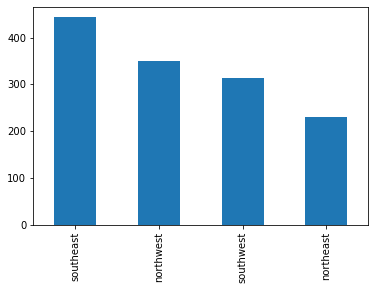

In [125]:
df.region.value_counts().plot(kind='bar')

# Filling Missing Values

In [126]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [127]:
df.age.fillna(df.age.mean(),inplace=True)

In [128]:
df.region.fillna(df.region.mode(),inplace=True)

In [129]:
df['age'] = df.age.astype('int')

# Bivariate Analysis

In [130]:
df.drop(columns=['index','PatientID'],inplace=True)

In [131]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39,male,23.2,91,Yes,0,No,southeast,1121.87
1,24,male,30.1,87,No,0,No,southeast,1131.51
2,38,male,33.3,82,Yes,0,No,southeast,1135.94
3,38,male,33.7,80,No,0,No,northwest,1136.40
4,38,male,34.1,100,No,0,No,northwest,1137.01


<AxesSubplot:xlabel='diabetic', ylabel='age'>

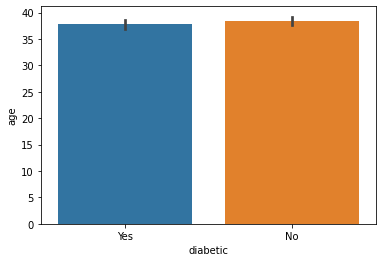

In [132]:
sns.barplot(data=df, x='diabetic',y='age')

<AxesSubplot:xlabel='smoker', ylabel='age'>

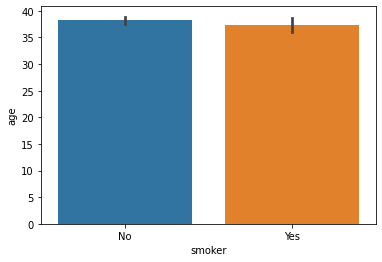

In [133]:
sns.barplot(data=df, x='smoker',y='age')

<AxesSubplot:>

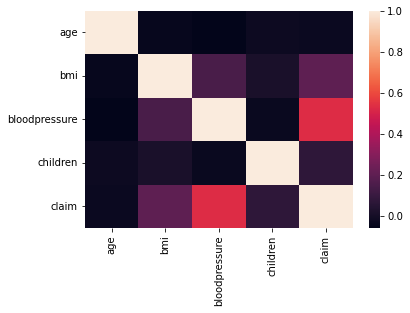

In [134]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='bmi', ylabel='bloodpressure'>

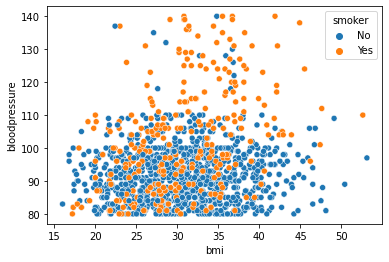

In [135]:
sns.scatterplot(data=df, y='bloodpressure', x='bmi',hue='smoker')

<AxesSubplot:xlabel='bloodpressure', ylabel='claim'>

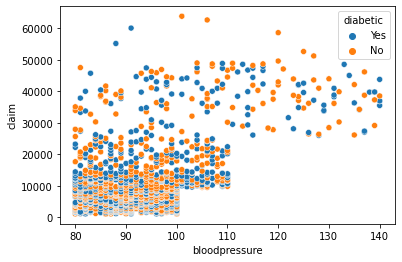

In [136]:
sns.scatterplot(data=df, x='bloodpressure',y='claim',hue='diabetic')

In [137]:
pd.crosstab(df['diabetic'],df['children'])

children,0,1,2,3,4,5
diabetic,,,,,,
No,292,179,120,83,13,11
Yes,284,145,120,74,12,7


In [138]:
pd.crosstab(df['diabetic'],df['region'])

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,110,192,225,170
Yes,121,157,218,144


In [139]:
def cat_age(num):
    if num < 18:
        return 'teen'
    elif num > 18 and num < 50:
        return ' adult'
    else:
        return 'senior citizen'

In [140]:
df['age_group'] = df['age'].apply(cat_age)

In [141]:
pd.crosstab(df['diabetic'],df['age_group'])

age_group,adult,senior citizen
diabetic,,
No,567,131
Yes,533,109


<AxesSubplot:xlabel='diabetic'>

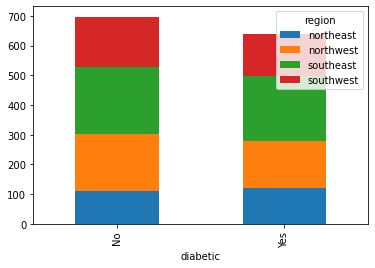

In [142]:
pd.crosstab(df['diabetic'],df['region']).plot(kind='bar',stacked=True)

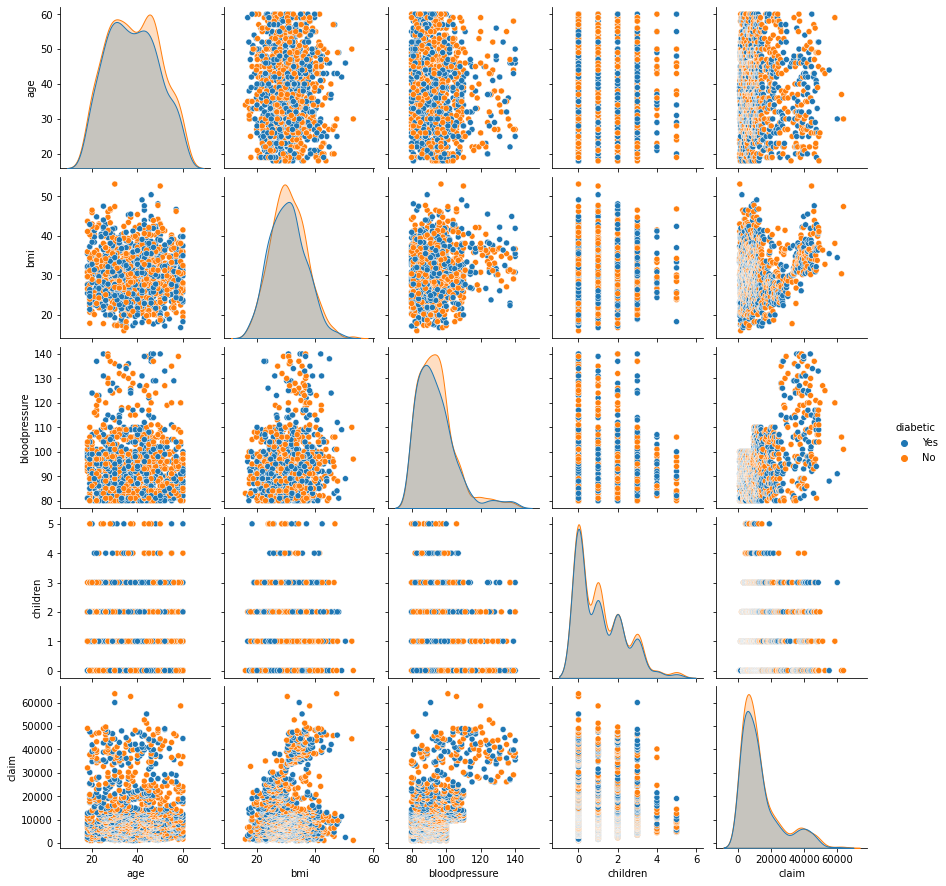

In [143]:
sns.pairplot(df,hue='diabetic')

<AxesSubplot:xlabel='age_group'>

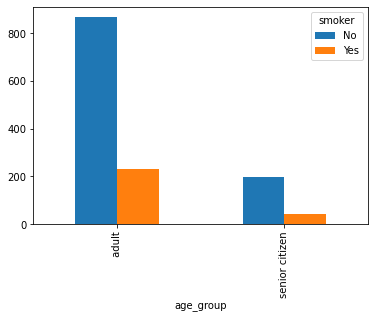

In [144]:
pd.crosstab(df['age_group'],df['smoker']).plot(kind='bar')

In [146]:
def cat_bmi(num):
    if num < 18:
        return 'underweight'
    elif num > 18 and num < 25:
        return 'normal'
    elif num > 25 and num < 30:
        return 'overweight'
    else:
        return 'obese'

In [147]:
df['health'] = df['bmi'].apply(cat_bmi)

<AxesSubplot:xlabel='diabetic'>

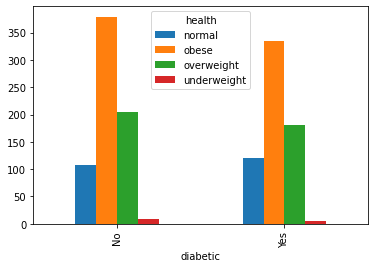

In [150]:
pd.crosstab(df['diabetic'], df['health']).plot(kind='bar')

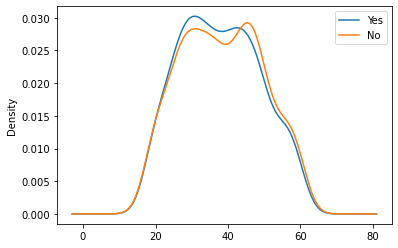

In [154]:
(df[df['diabetic'] == 'Yes']['age']).plot(kind='kde',label='Yes')
(df[df['diabetic'] == 'No']['age']).plot(kind='kde',label='No')
plt.legend()
plt.show()

In [155]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,health
0,39,male,23.2,91,Yes,0,No,southeast,1121.87,adult,normal
1,24,male,30.1,87,No,0,No,southeast,1131.51,adult,obese
2,38,male,33.3,82,Yes,0,No,southeast,1135.94,adult,obese
3,38,male,33.7,80,No,0,No,northwest,1136.40,adult,obese
4,38,male,34.1,100,No,0,No,northwest,1137.01,adult,obese
...,...,...,...,...,...,...,...,...,...,...,...
1335,44,female,35.5,88,Yes,0,Yes,northwest,55135.40,adult,obese
1336,59,female,38.1,120,No,1,Yes,northeast,58571.07,senior citizen,obese
1337,30,male,34.5,91,Yes,3,Yes,northwest,60021.40,adult,obese
1338,37,male,30.4,106,No,0,Yes,southeast,62592.87,adult,obese


<AxesSubplot:xlabel='gender', ylabel='claim'>

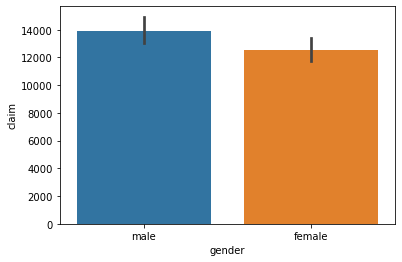

In [156]:
sns.barplot(data=df, x='gender',y='claim')

<AxesSubplot:xlabel='gender', ylabel='children'>

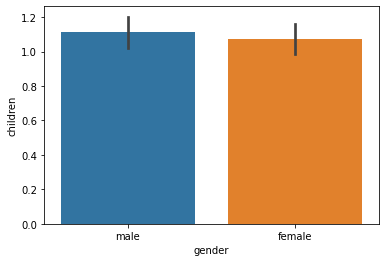

In [157]:
sns.barplot(data=df, x='gender', y='children')